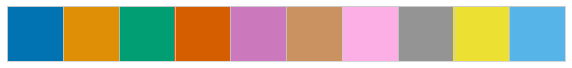

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind", n_colors=10)

palette = sns.color_palette(palette="colorblind", n_colors=10)
sns.palplot(palette)

## Point Estimate

Point estimates are estimates of population parameters based on sample data.

**Population:** Number of orders at a website per hour. We will use a Poisson random variable as this is typically used to model the number of times an event happened in a time interval. However, we will combine two poisson distributions to create an interesting distribution.

**Sample:** Random choice of 500 orders per hour. Calculate point estimate of population mean, the sample mean.

In [85]:
np.random.seed(10)

orders_1 = stats.poisson.rvs(mu=40, size=200000)
orders_2 = stats.poisson.rvs(mu=10, size=150000)
orders = np.concatenate([orders_1, orders_2])
print(f"population mean: {orders.mean()}")
print("")

np.random.seed(10)
sample_sizes = [10, 50, 100, 200, 500, 1000, 3000, 10000, 20000]
for sample_size in sample_sizes:
    sample = np.random.choice(orders, size=sample_size)
    print(f"sample mean (sample={sample_size}): {sample.mean()}")

population mean: 27.145874285714285

sample mean (sample=10): 25.1
sample mean (sample=50): 23.18
sample mean (sample=100): 25.08
sample mean (sample=200): 27.995
sample mean (sample=500): 26.75
sample mean (sample=1000): 27.085
sample mean (sample=3000): 27.34
sample mean (sample=10000): 27.2043
sample mean (sample=20000): 27.42235


We expect the distribution of the sample to be of similar shape to that of the population. Therefore, we can assume that the the sample mean $\overline{x}$ should have the same value as population mean $\mu$. Usually, the point estimator becomes more accurate as the size of the sample increases.

### The Central Limit Theorem

In statistics we often assume that our data follows a gaussian distribution. Gaussian distributions have nice properties like being symmetric and having the majority of the data clustered within a few standard deviations of the mean. The real world often does not follow normal distributions, additionally a sample tends to follow the distribution of the population. This means a sample taken from a population that is not gaussian will also tend to be not gaussian.


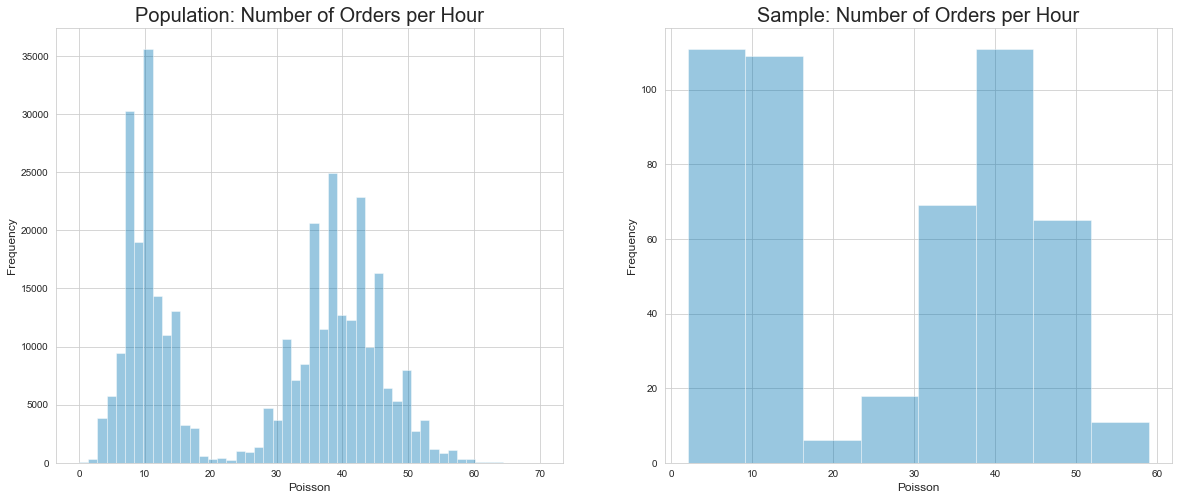

In [95]:
fig = plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)

sns.distplot(
    orders, 
    kde=False,
    ax=ax1
)

ax1.set_title("Population: Number of Orders per Hour", fontsize=20)
ax1.set_xlabel("Poisson", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)

ax2 = plt.subplot(1, 2, 2)

sample = np.random.choice(orders, size=500)

sns.distplot(
    sample ,
    kde=False,
    ax=ax2
)

ax2.set_title("Sample: Number of Orders per Hour", fontsize=20)
ax2.set_xlabel("Poisson", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

plt.show()